In [1]:
import sys
sys.path.append('..')
sys.path.append('../..')

from stats import *
from sentiment_stats import *

from peewee import SQL
from database.models import RawFacebookComments, RawTwitterComments, RawInstagramComments, RawYouTubeComments, RawHashtagComments

rede_social = 'Instagram'
modelo = RawInstagramComments

cores = ['#FFA726', '#66BB6A', '#42A5F5', '#FFEE58', '#EF5350', '#AB47BC', '#C8C8C8']
cores2 = ['#FFA726', '#AB47BC', '#FFEE58', '#C8C8C8', '#EF5350', '#66BB6A', '#42A5F5']
cores_val = ['#EF5350', '#C8C8C8', '#66BB6A']
cores_val2 = ['#66BB6A', '#EF5350', '#C8C8C8']
sentimentos = ['ALEGRIA', 'SURPRESA', 'TRISTEZA', 'MEDO', 'RAIVA', 'DESGOSTO', 'NEUTRO']
valencia = ['POSITIVO', 'NEGATIVO', 'NEUTRO']

valencia_dict = OrderedDict()
for val in valencia:
    valencia_dict[val] = 0

sentimentos_dict = OrderedDict()
for sentimento in sentimentos:
    sentimentos_dict[sentimento] = 0
    
default_clause = [
    SQL('length(clean_comment) > 0'),
]

positivo_clause = [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL('emotion in ("ALEGRIA", "SURPRESA") AND valence = "POSITIVO"')
]

negativo_clause = [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL('emotion in ("TRISTEZA", "RAIVA", "MEDO", "DESGOSTO") AND valence = "NEGATIVO"')
]

neutro_clause = [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL('emotion in ("NEUTRO") AND valence = "NEUTRO"')
]

general = default_clause + [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL("""
        (emotion in ("ALEGRIA", "SURPRESA") AND valence = "POSITIVO") 
        OR 
        (emotion in ("TRISTEZA", "RAIVA", "MEDO", "DESGOSTO") AND valence = "NEGATIVO")
        OR
        (emotion in ("NEUTRO") AND valence = "NEUTRO")
    """)
]

### Emoções gerais dos comentários : Instagram

In [2]:
total_comentarios = modelo.select() \
        .where(default_clause) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause)) \
        .order_by(modelo.hash)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause)) \
        .order_by(modelo.hash)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause)) \
        .order_by(modelo.hash)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general)) \
        .order_by(modelo.hash)

In [3]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Instagram:
--------------------
Total de Comentários  : 38739
Comentários Positivos : 7231
Comentários Negativos : 7428
Comentários Neutros   : 1056

Porcentagem de comentários:
--------------------
Comentários Positivos : 18.67%
Comentários Negativos : 19.17%
Comentários Neutros   : 2.73%
Total                 : 40.57%


#### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,7231,7428,1056


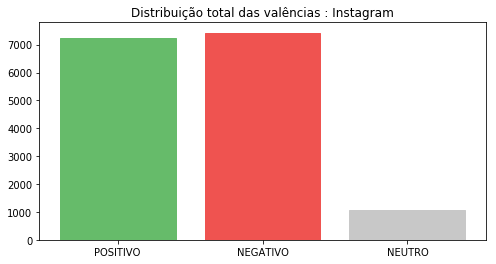

In [4]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

#### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,7165,66,6780,0,48,600,1056


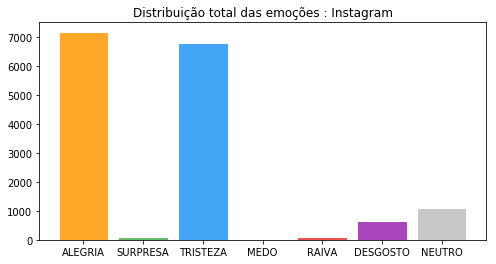

In [5]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

### Emoções por candidato : Instagram

#### Jair Bolsonaro

In [6]:
candidato_c = [modelo.candidate == 'Jair Bolsonaro']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + candidato_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + candidato_c)) \
        .order_by(modelo.hash)

In [7]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Instagram:
--------------------
Total de Comentários  : 10695
Comentários Positivos : 1884
Comentários Negativos : 2339
Comentários Neutros   : 222

Porcentagem de comentários:
--------------------
Comentários Positivos : 17.62%
Comentários Negativos : 21.87%
Comentários Neutros   : 2.08%
Total                 : 41.56%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,1884,2339,222


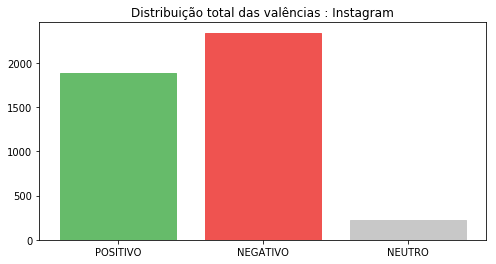

In [8]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,1857,27,2172,0,9,158,222


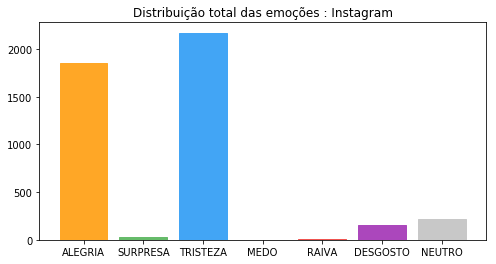

In [9]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

#### Fernando Haddad

In [10]:
candidato_c = [modelo.candidate == 'Fernando Haddad']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + candidato_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + candidato_c)) \
        .order_by(modelo.hash)

In [11]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Instagram:
--------------------
Total de Comentários  : 7522
Comentários Positivos : 1218
Comentários Negativos : 1195
Comentários Neutros   : 390

Porcentagem de comentários:
--------------------
Comentários Positivos : 16.19%
Comentários Negativos : 15.89%
Comentários Neutros   : 5.18%
Total                 : 37.26%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,1218,1195,390


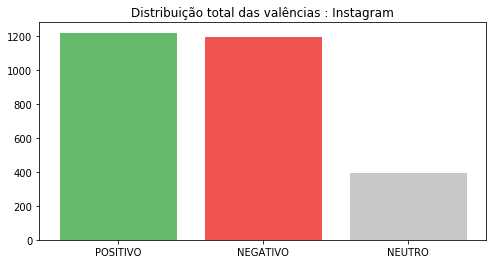

In [12]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,1208,10,1102,0,6,87,390


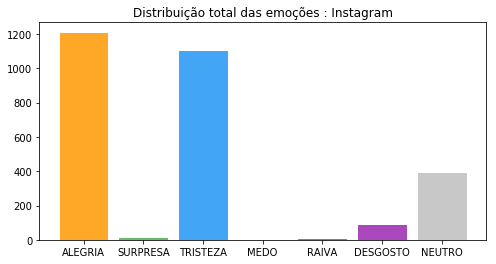

In [13]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

#### Ciro Gomes

In [14]:
candidato_c = [modelo.candidate == 'Ciro Gomes']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + candidato_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + candidato_c)) \
        .order_by(modelo.hash)

In [15]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Instagram:
--------------------
Total de Comentários  : 5020
Comentários Positivos : 1207
Comentários Negativos : 897
Comentários Neutros   : 94

Porcentagem de comentários:
--------------------
Comentários Positivos : 24.04%
Comentários Negativos : 17.87%
Comentários Neutros   : 1.87%
Total                 : 43.78%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,1207,897,94


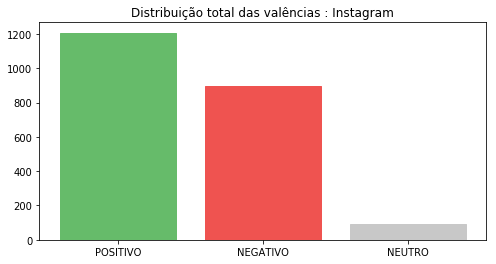

In [16]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,1203,4,810,0,6,81,94


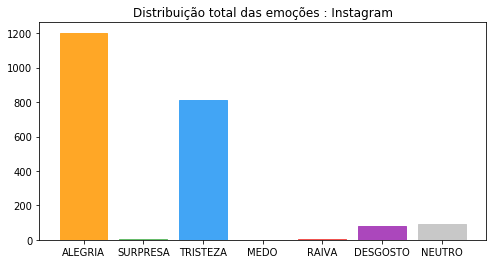

In [17]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

#### Geraldo Alckmin

In [18]:
candidato_c = [modelo.candidate == 'Geraldo Alckmin']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + candidato_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + candidato_c)) \
        .order_by(modelo.hash)

In [19]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Instagram:
--------------------
Total de Comentários  : 6511
Comentários Positivos : 1364
Comentários Negativos : 1226
Comentários Neutros   : 149

Porcentagem de comentários:
--------------------
Comentários Positivos : 20.95%
Comentários Negativos : 18.83%
Comentários Neutros   : 2.29%
Total                 : 42.07%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,1364,1226,149


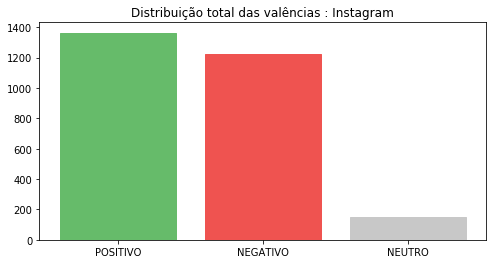

In [20]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,1354,10,1104,0,5,117,149


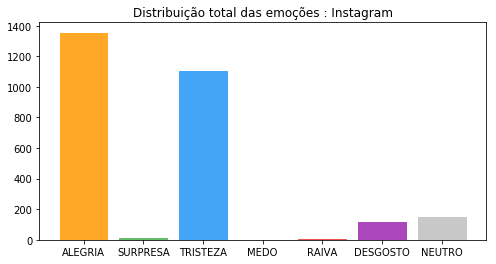

In [21]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

#### Marina Silva

In [22]:
candidato_c = [modelo.candidate == 'Marina Silva']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + candidato_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + candidato_c)) \
        .order_by(modelo.hash)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + candidato_c)) \
        .order_by(modelo.hash)

In [23]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Instagram:
--------------------
Total de Comentários  : 8991
Comentários Positivos : 1558
Comentários Negativos : 1771
Comentários Neutros   : 201

Porcentagem de comentários:
--------------------
Comentários Positivos : 17.33%
Comentários Negativos : 19.7%
Comentários Neutros   : 2.24%
Total                 : 39.26%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,1558,1771,201


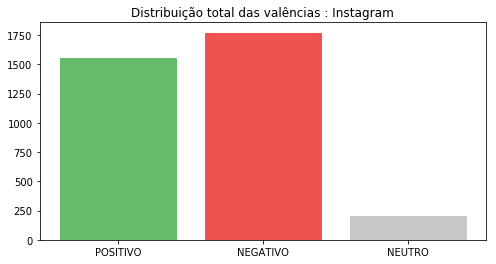

In [24]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,1543,15,1592,0,22,157,201


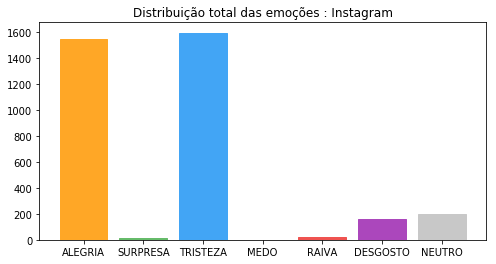

In [25]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)